# **Linear Discriminant Analysis (LDA) of UCI Wine dataset in R**

## **Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alkalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. )OD280/OD315 of diluted wines
13. Proline

## **Part 1: Data Preprocessing**

### **Importing the dataset**

In [1]:
ds = read.csv('/content/wine.data', header = FALSE)
head(ds) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [2]:
colnames(ds) = c('Customer_Segment', 
                 'Alcohol', 
                 'Malic_Acid', 
                 'Ash', 'Ash_Alcanity', 
                 'Magnesium', 
                 'Total_Phenols', 
                 'Flavanoids', 
                 'Nonflavanoid_Phenols', 
                 'Proanthocyanins', 
                 'Color_Intensity', 
                 'Hue', 'OD280', 
                 'Proline')
head(ds)

,Customer_Segment,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
ds = ds[c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1)]
head(ds)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
6,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1


In [4]:
#find number of rows with missing values
sum(!complete.cases(ds))

# Omit any null rows
ds = na.omit(ds)

[1] 0

In [5]:
summary(ds)

    Alcohol        Malic_Acid         Ash         Ash_Alcanity  
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60  
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20  
 Median :13.05   Median :1.865   Median :2.360   Median :19.50  
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49  
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50  
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
   Magnesium      Total_Phenols     Flavanoids    Nonflavanoid_Phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_Intensity       Hue      

### **Splitting the dataset into the Train set and Test set**

In [6]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




### **Feature Scaling**

In [7]:
train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])

## **Part 2: Building SVM Classification Model**

In [8]:
#Fitting SVM to the Training set
install.packages('e1071')
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

#Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-14])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 14], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




   y_pred
     1  2  3
  1 12  0  0
  2  0 13  1
  3  0  0 10
Accuracy of Support Vector Classification Model is: 0.9722222

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1.0000000,1.0000000,1.000000
2,1.0000000,0.9285714,0.962963
3,0.9090909,1.0000000,0.952381


## **Part 3: Applying PCA**

In [9]:
install.packages('caret')
library(caret)
install.packages('e1071')
library(e1071)
pca = preProcess(x = train_set[-14], method = 'pca', pcaComp = 2)
train_set = predict(pca, train_set)
test_set = predict(pca, test_set)
print(head(train_set))
print(head(test_set))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  Customer_Segment       PC1        PC2
1                1 -3.249569  1.5661160
2                1 -2.165889 -0.3186768
3                1 -2.501192  1.2353892
6                1 -2.941040  2.2999654
7                1 -2.393131  1.3228050
9                1 -2.418465  1.0367916
   Customer_Segment       PC1       PC2
4                 1 -3.481905 2.7632899
5                 1 -1.036443 0.9838128
8                 1 -1.986189 1.5520613
11                1 -3.329896 1.2446480
16                1 -2.236477 1.6347229
20                1 -2.112082 1.0008301


In [10]:
train_set = train_set[c(2, 3, 1)]
test_set = test_set[c(2, 3, 1)]
print(head(train_set))
print(head(test_set))

        PC1        PC2 Customer_Segment
1 -3.249569  1.5661160                1
2 -2.165889 -0.3186768                1
3 -2.501192  1.2353892                1
6 -2.941040  2.2999654                1
7 -2.393131  1.3228050                1
9 -2.418465  1.0367916                1
         PC1       PC2 Customer_Segment
4  -3.481905 2.7632899                1
5  -1.036443 0.9838128                1
8  -1.986189 1.5520613                1
11 -3.329896 1.2446480                1
16 -2.236477 1.6347229                1
20 -2.112082 1.0008301                1


### **Building & Training the Support Vector Classification model on the Principal Component Train set**

In [11]:
# Fitting SVM to the Training set
install.packages('e1071')
library(e1071)
classifier = svm(formula = Customer_Segment ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of PDA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   y_pred
     1  2  3
  1 12  0  0
  2  0 14  0
  3  0  0 10
Accuracy of PDA Support Vector Classification Model is: 1

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,1,1,1
2,1,1,1
3,1,1,1


### **Visualizing the Principal Component Train sets**

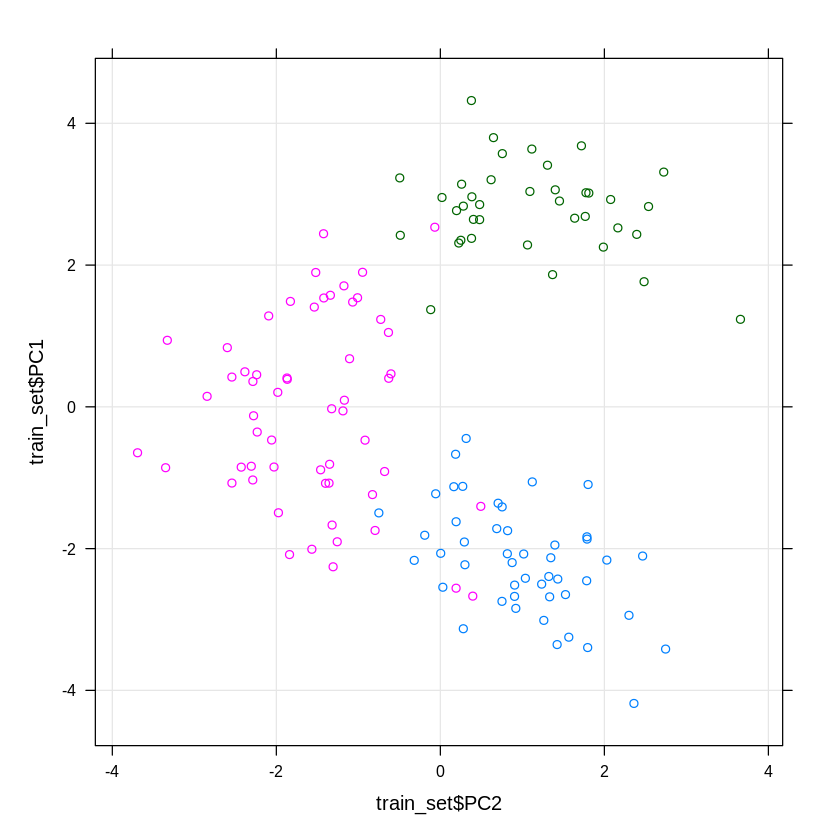

In [12]:
library(lattice)
xyplot(train_set$PC1 ~ train_set$PC2, group=train_set$Customer_Segment, grid=TRUE, asp=1)

### **Visualising the Principal Component Train set results**

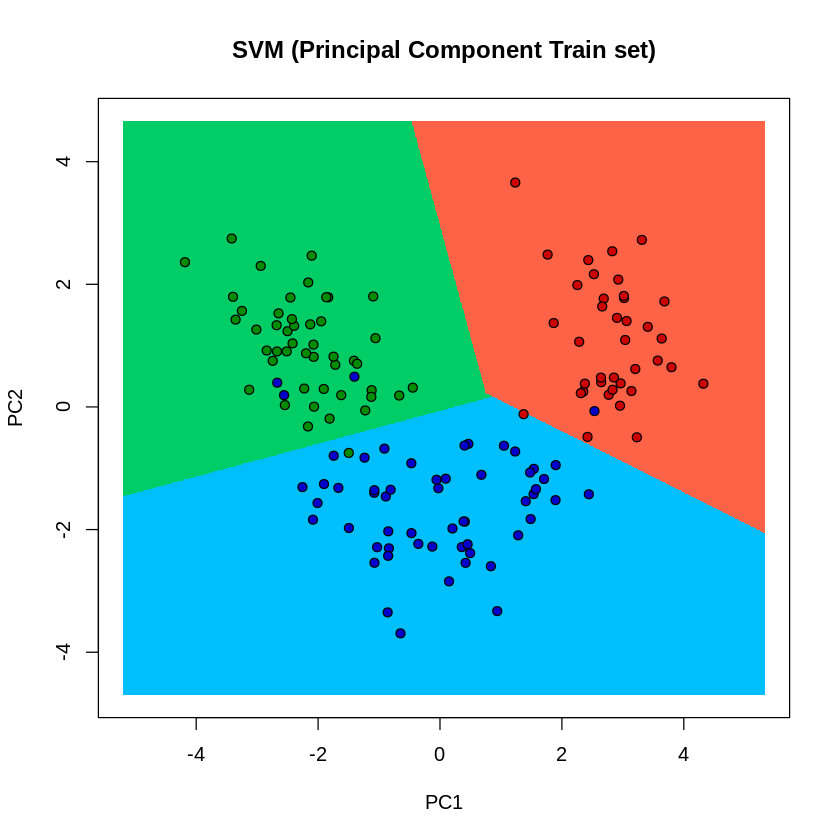

In [13]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Principal Component Train set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

### **Visualizing the Principal Component Test sets**

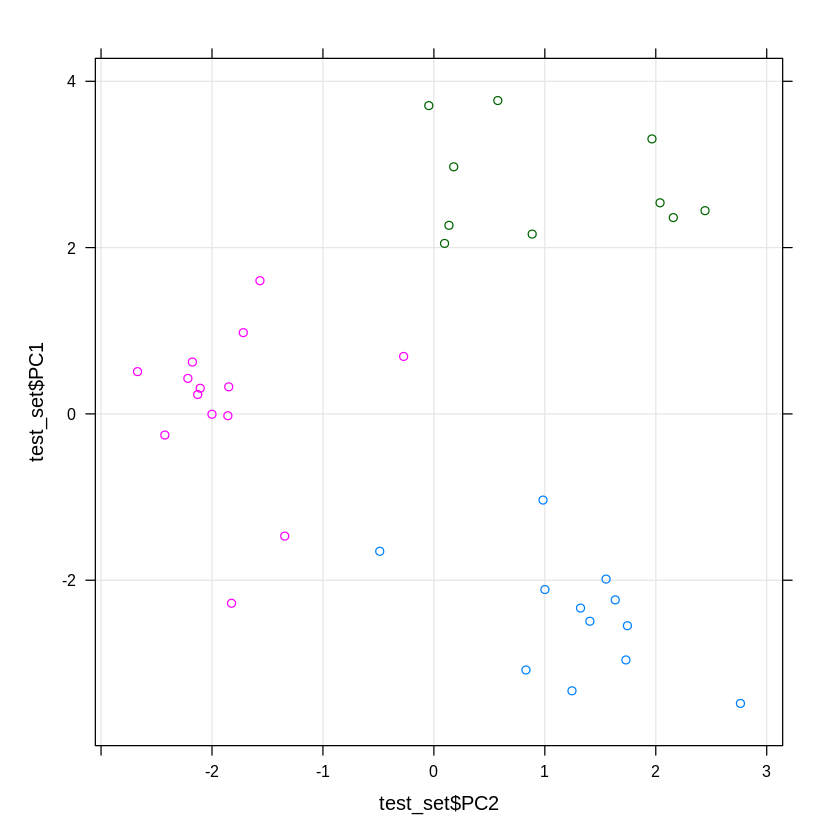

In [14]:
library(lattice)
xyplot(test_set$PC1 ~ test_set$PC2, group=test_set$Customer_Segment, grid=TRUE, asp=1)

### **Visualizing the Principal Component Test set results**

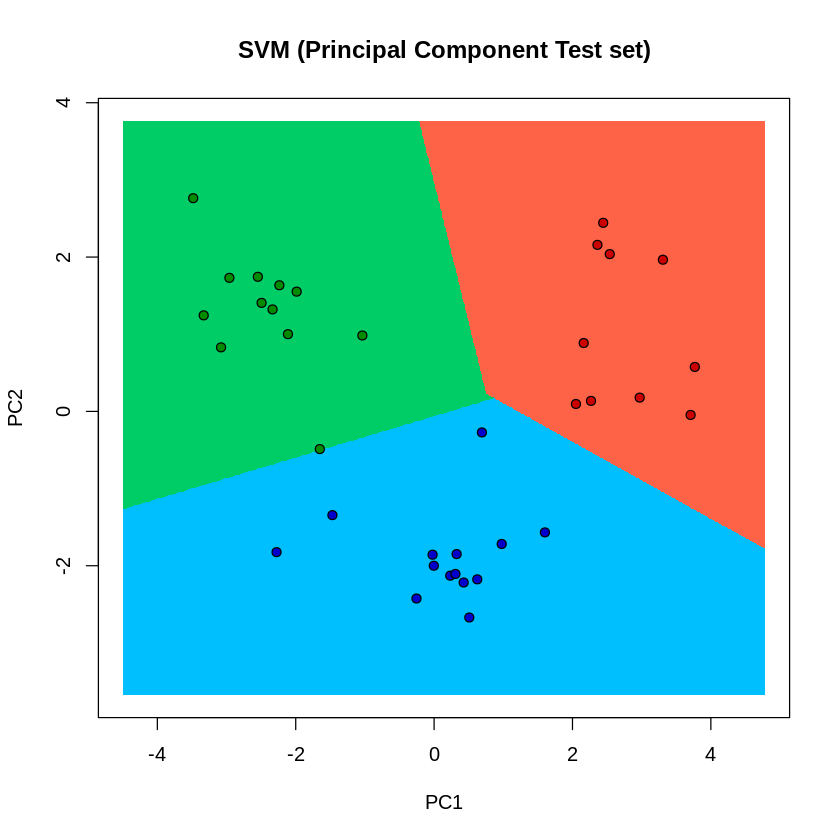

In [15]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('PC1', 'PC2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'SVM (Principal Component Test set)',
     xlab = 'PC1', ylab = 'PC2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

## **Part 4: Applying LDA**

In [16]:
#Splitting the dataset into the Train set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Customer_Segment, SplitRatio = 0.8)
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)

#Feature Scaling

train_set[-14] = scale(train_set[-14])
test_set[-14] = scale(test_set[-14])

library(MASS)
lda = lda(formula = Customer_Segment ~ ., data = train_set)
train_set = as.data.frame(predict(lda, train_set))
test_set = as.data.frame(predict(lda, test_set))
print(head(train_set))
print(head(test_set))
train_set = train_set[c(5, 6, 1)]
test_set = test_set[c(5, 6, 1)]
print(head(train_set))
print(head(test_set))

  class posterior.1  posterior.2  posterior.3     x.LD1    x.LD2
1     1   1.0000000 1.402325e-09 5.656888e-17 -4.656187 2.081444
2     1   0.9999999 1.142655e-07 5.546095e-16 -4.336729 1.267238
3     1   0.9999936 6.408747e-06 1.321058e-12 -3.292202 1.167575
6     1   1.0000000 1.901419e-11 1.858141e-16 -4.515987 3.265418
7     1   1.0000000 8.480654e-12 8.206972e-17 -4.627289 3.369602
9     1   1.0000000 2.703595e-08 1.193997e-14 -3.936469 1.967177
   class posterior.1  posterior.2  posterior.3     x.LD1    x.LD2
4      1   1.0000000 6.901624e-12 4.696904e-15 -4.092791 3.879201
5      1   0.8113902 1.886059e-01 3.890313e-06 -1.252520 0.321187
8      1   1.0000000 3.382810e-10 9.499796e-15 -3.984139 3.009815
11     1   1.0000000 1.013939e-08 7.042600e-17 -4.619335 1.623783
16     1   1.0000000 2.336029e-08 6.833553e-12 -3.097161 2.723515
20     1   0.9999998 2.368751e-07 5.948939e-13 -3.410850 1.881416
      x.LD1    x.LD2 class
1 -4.656187 2.081444     1
2 -4.336729 1.267238     1
3 

### **Building & Training the Support Vector Classification model on the Linear Discriminant Train set**

In [17]:
# Fitting SVM to the Training set
# install.packages('e1071')
library(e1071)
classifier = svm(formula = class ~ .,
                 data = train_set,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Evaluation Metrics
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)
print(cm)
# Evaluation Metrics
n = sum(cm) # number of instances
nc = nrow(cm) # number of classes
diag = diag(cm) # number of correctly classified instances per class 
rowsums = apply(cm, 1, sum) # number of instances per class
colsums = apply(cm, 2, sum) # number of predictions per class
p = rowsums / n # distribution of instances over the actual classes
q = colsums / n # distribution of instances over the predicted classes
accuracy = sum(diag) / n 
cat("Accuracy of LDA Support Vector Classification Model is:", accuracy)  
precision = diag / colsums 
recall = diag / rowsums 
f1 = 2 * precision * recall / (precision + recall) 
data.frame(precision, recall, f1)

   y_pred
     1  2  3
  1 12  0  0
  2  1 13  0
  3  0  0 10
Accuracy of LDA Support Vector Classification Model is: 0.9722222

,precision,recall,f1
,<dbl>,<dbl>,<dbl>
1,0.9230769,1.0000000,0.960000
2,1.0000000,0.9285714,0.962963
3,1.0000000,1.0000000,1.000000


### **Visualizing the Linear Discriminant Train sets**

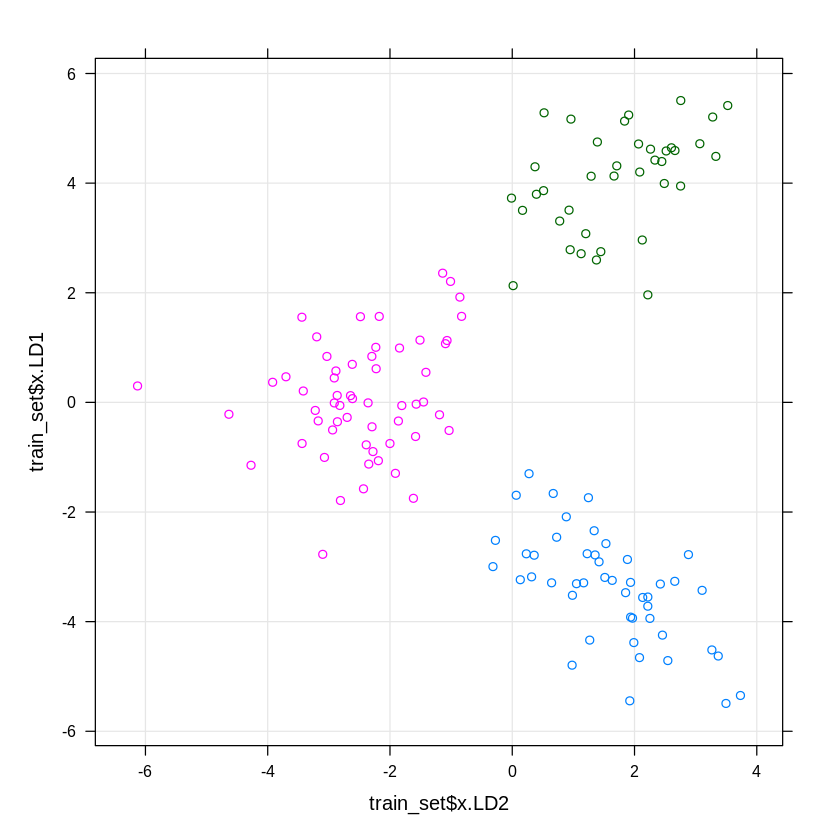

In [18]:
library(lattice)
xyplot(train_set$x.LD1 ~ train_set$x.LD2, group=train_set$class, grid=TRUE, asp=1)

### **Visualising the Linear Discriminant Train set results**

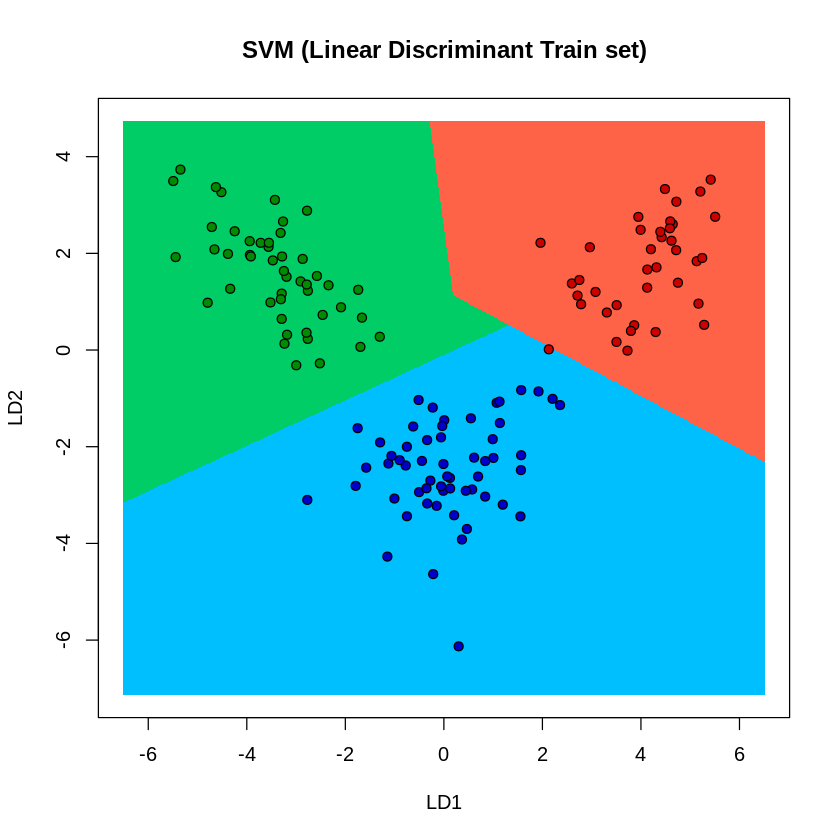

In [19]:
#library(Rfast)
set = train_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Linear Discriminant Train set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))

### **Visualizing the Linear Discriminant Test sets**

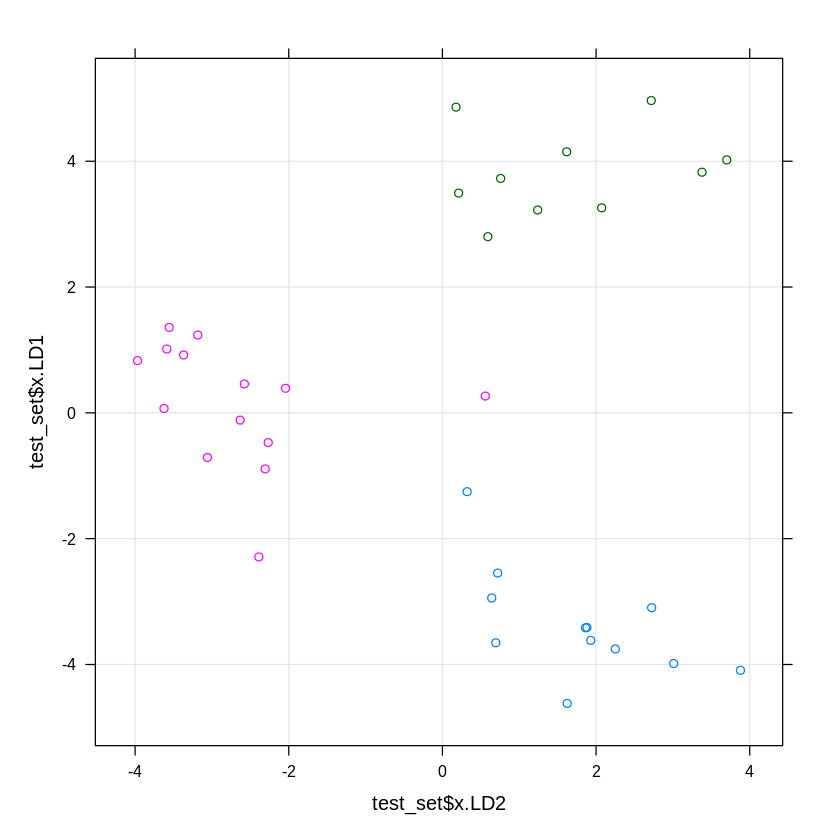

In [20]:
library(lattice)
xyplot(test_set$x.LD1 ~ test_set$x.LD2, group=test_set$class, grid=TRUE, asp=1)

### **Visualising the Linear Discriminant Test set results**

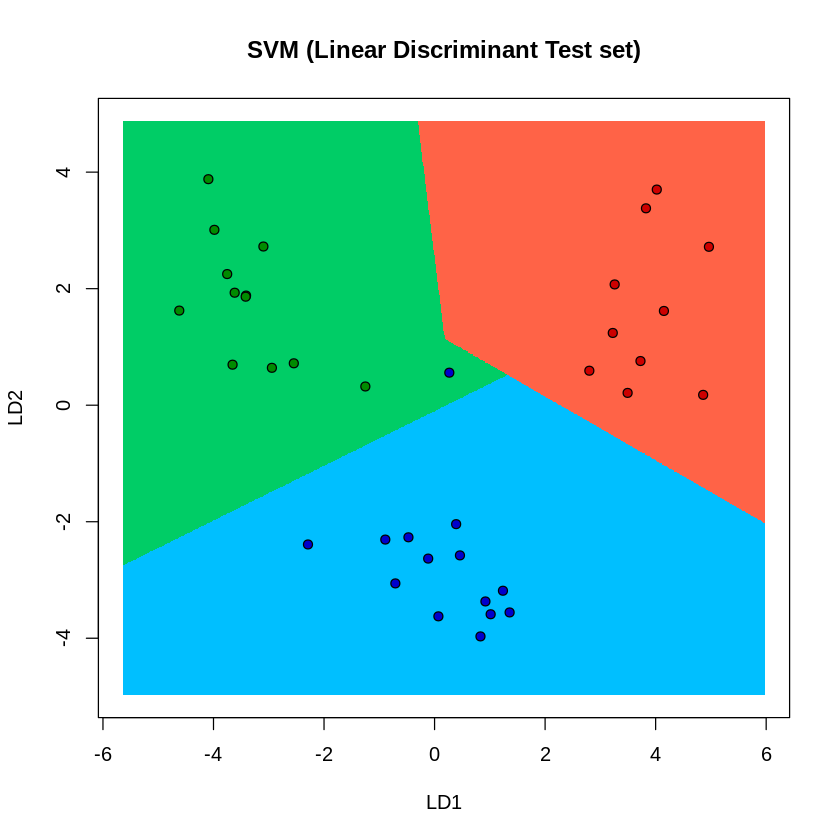

In [21]:
#library(Rfast)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('x.LD1', 'x.LD2')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'SVM (Linear Discriminant Test set)',
     xlab = 'LD1', ylab = 'LD2',
     xlim = range(X1), ylim = range(X2))
#contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 2, 'deepskyblue', ifelse(y_grid == 1, 'springgreen3', 'tomato')))
points(set, pch = 21, bg = ifelse(set[, 3] == 2, 'blue3', ifelse(set[, 3] == 1, 'green4', 'red3')))